# Computer Vision Morphological Transformations

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Dilation

In [4]:
# Create a simple 3 by 3 kernel of ones with numpy

kernel = np.ones((3,3), dtype='uint8')
kernel

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=uint8)

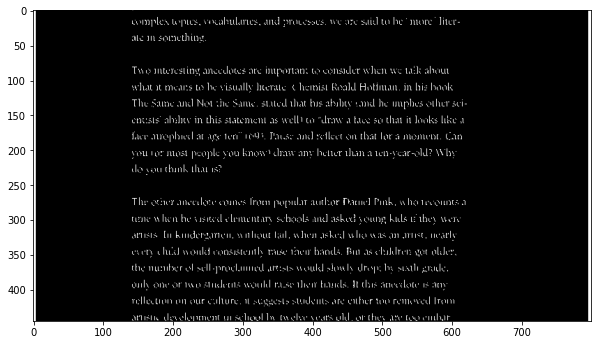

In [19]:
# Load an image, threshold it (binary_inverse) and apply dilation with openCV, try different number of iterations

doc = cv2.imread('./img/document.jpg')
ret, doc_inv = cv2.threshold(doc, 127, 255, cv2.THRESH_BINARY_INV)

plt.figure(figsize=(10,10))
plt.imshow(doc_inv)

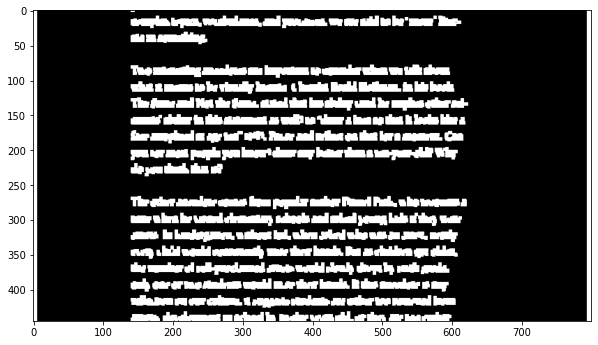

In [26]:
doc_dilate = cv2.dilate(doc_inv, kernel, iterations = 2)

plt.figure(figsize=(10,10))
plt.imshow(doc_dilate)

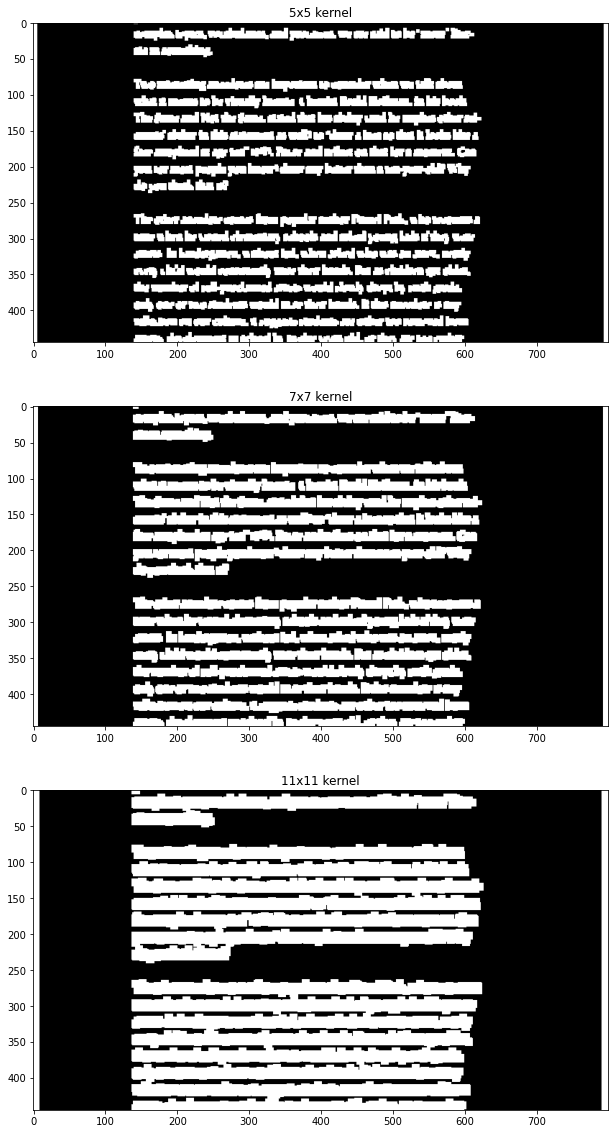

In [35]:
# Try with bigger kernels (5,5) and (7,7) or bigger and check what is the difference

kernel_5 = np.ones((5,5), dtype='uint8')
kernel_7 = np.ones((7,7), dtype='uint8')
kernel_11 = np.ones((11,11), dtype='uint8')

doc_dilate_5 = cv2.dilate(doc_inv, kernel_5)
doc_dilate_7 = cv2.dilate(doc_inv, kernel_7)
doc_dilate_11 = cv2.dilate(doc_inv, kernel_11)

fig, axes = plt.subplots(3, 1, figsize=(20, 20))

axes[0].imshow(doc_dilate_5, cmap='gray')
axes[1].imshow(doc_dilate_7, cmap='gray')
axes[2].imshow(doc_dilate_11, cmap='gray')

axes[0].title.set_text('5x5 kernel')
axes[1].title.set_text('7x7 kernel')
axes[2].title.set_text('11x11 kernel')

[Hint](# "cv2.dilate") 

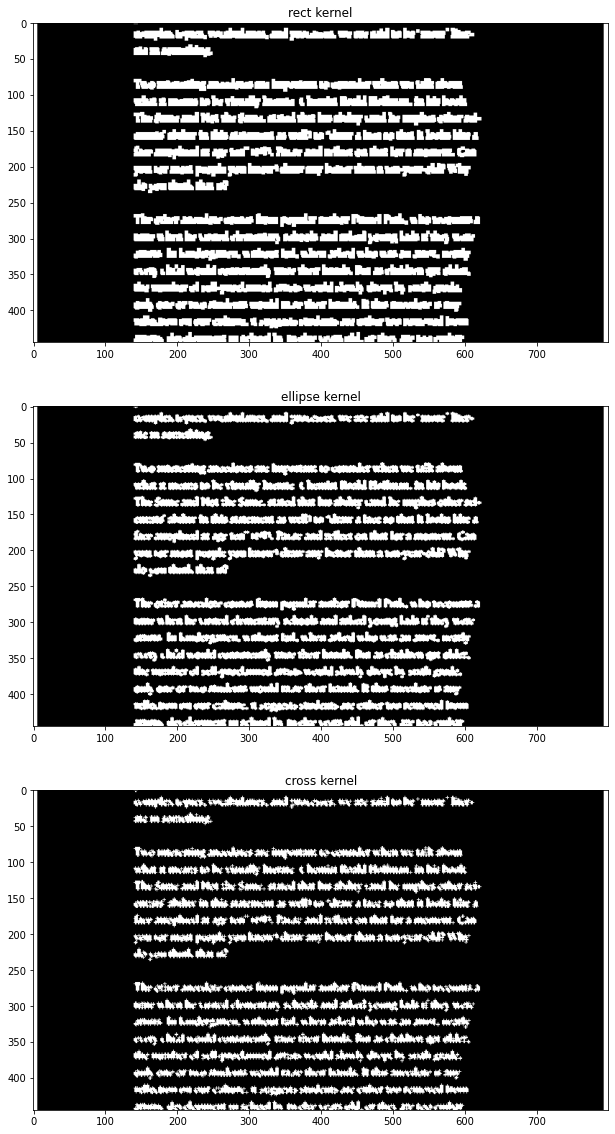

In [34]:
# Repeat the operation but this time create a special kernel with cv2.getStructuringElement, try different elements
# For example cv2.MORPH_RECT, cv2.MORPH_ELLIPSE and cv2.MORPH_CROSS, etc.
# Compare how the different kernels will affect the image

kernel_rect = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
kernel_ellipse = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
kernel_cross = cv2.getStructuringElement(cv2.MORPH_CROSS, (5,5))

doc_rect = cv2.dilate(doc_inv, kernel_rect)
doc_ellipse = cv2.dilate(doc_inv, kernel_ellipse)
doc_cross = cv2.dilate(doc_inv, kernel_cross)

fig, axes = plt.subplots(3, 1, figsize=(20, 20))

axes[0].imshow(doc_rect, cmap='gray')
axes[1].imshow(doc_ellipse, cmap='gray')
axes[2].imshow(doc_cross, cmap='gray')

axes[0].title.set_text('rect kernel')
axes[1].title.set_text('ellipse kernel')
axes[2].title.set_text('cross kernel')

## Erosion

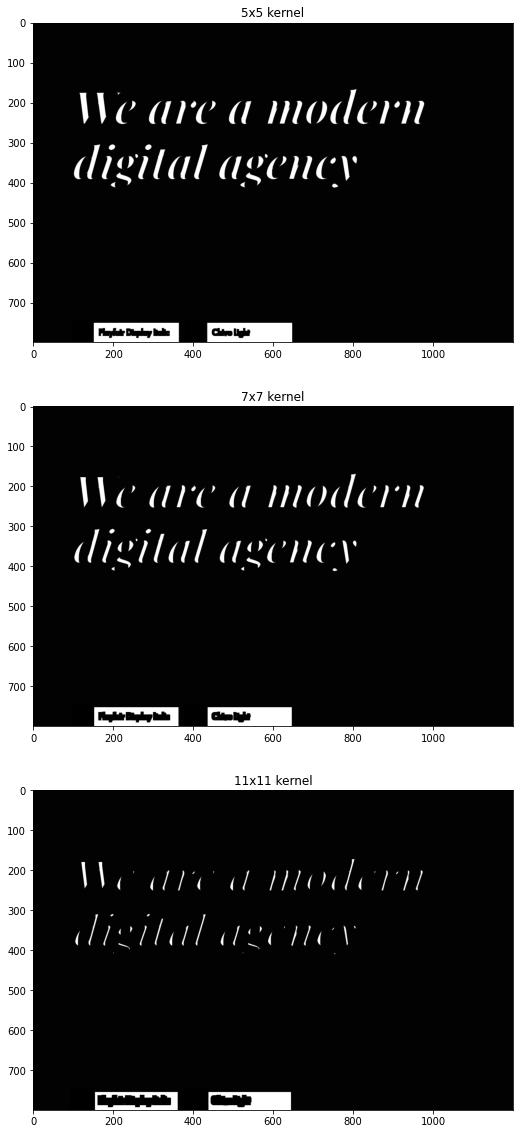

In [38]:
# Using the same kernels, apply Erosion to the thresholded image, make sure to start with a clean image

erosion_img = cv2.imread('./img/erosion_img.png')

doc_erosion_5 = cv2.erode(erosion_img, kernel_5)
doc_erosion_7 = cv2.erode(erosion_img, kernel_7)
doc_erosion_11 = cv2.erode(erosion_img, kernel_11)

fig, axes = plt.subplots(3, 1, figsize=(20, 20))

axes[0].imshow(doc_erosion_5, cmap='gray')
axes[1].imshow(doc_erosion_7, cmap='gray')
axes[2].imshow(doc_erosion_11, cmap='gray')

axes[0].title.set_text('5x5 kernel')
axes[1].title.set_text('7x7 kernel')
axes[2].title.set_text('11x11 kernel')

[Hint](# "cv2.erode") 

## Morphological Transformations: Opening / Closing

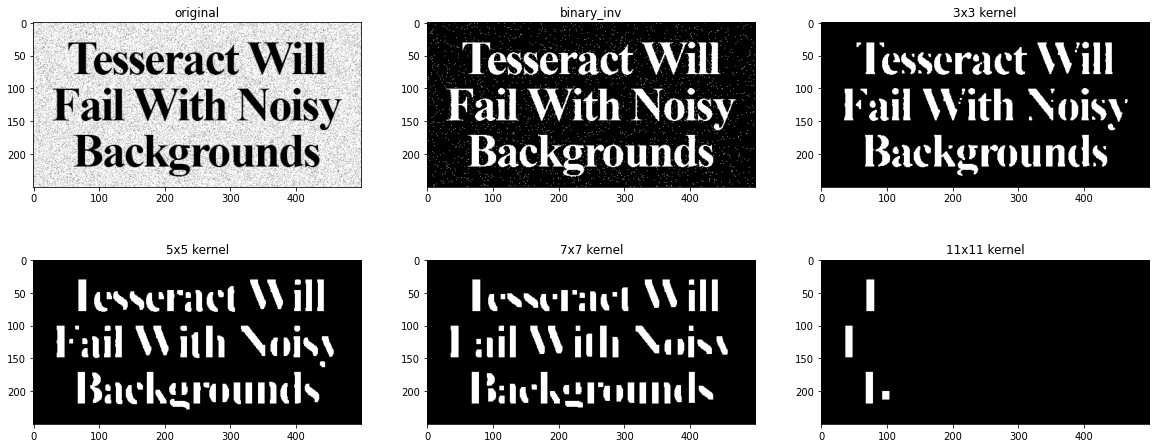

In [51]:
# Apply opening to the thresholded image, experiment with different iterations 
 
noisy = cv2.imread('./img/noisy_img.png')
ret, noisy_inv = cv2.threshold(noisy, 127, 255, cv2.THRESH_BINARY_INV)

noisy_3 = cv2.morphologyEx(noisy_inv, cv2.MORPH_OPEN, kernel)
noisy_5 = cv2.morphologyEx(noisy_inv, cv2.MORPH_OPEN, kernel_5)
noisy_7 = cv2.morphologyEx(noisy_inv, cv2.MORPH_OPEN, kernel_7)
noisy_11 = cv2.morphologyEx(noisy_inv, cv2.MORPH_OPEN, kernel_11)


fig, axes = plt.subplots(2, 3, figsize=(20, 8))

axes[0, 0].imshow(noisy, cmap='gray')
axes[0, 1].imshow(noisy_inv, cmap='gray')
axes[0, 2].imshow(noisy_3, cmap='gray')
axes[1, 0].imshow(noisy_5, cmap='gray')
axes[1, 1].imshow(noisy_7, cmap='gray')
axes[1, 2].imshow(noisy_11, cmap='gray')


axes[0, 0].title.set_text('original')
axes[0, 1].title.set_text('binary_inv')
axes[0, 2].title.set_text('3x3 kernel')
axes[1, 0].title.set_text('5x5 kernel')
axes[1, 1].title.set_text('7x7 kernel')
axes[1, 2].title.set_text('11x11 kernel')

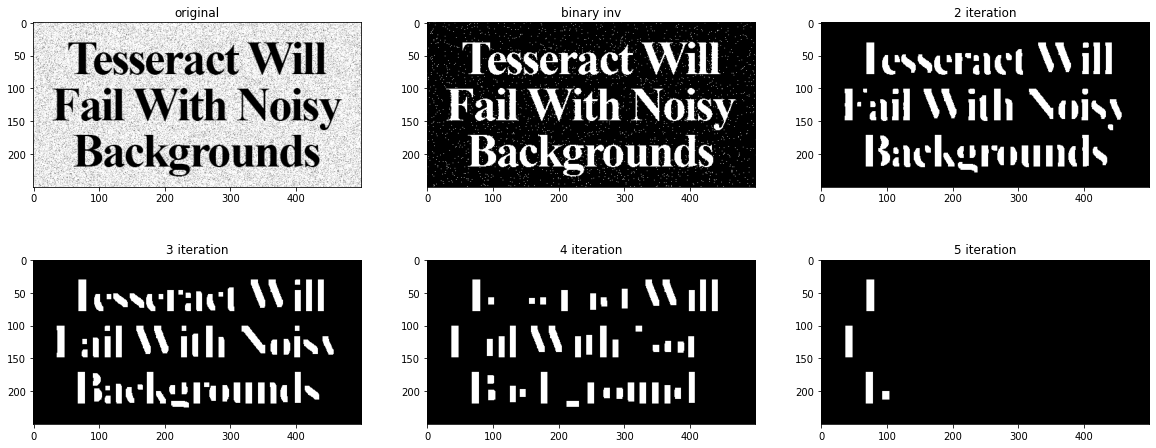

In [63]:
noisy_2it = cv2.morphologyEx(noisy_inv, cv2.MORPH_OPEN, kernel, iterations=2)
noisy_3it = cv2.morphologyEx(noisy_inv, cv2.MORPH_OPEN, kernel, iterations=3)
noisy_4it = cv2.morphologyEx(noisy_inv, cv2.MORPH_OPEN, kernel, iterations=4)
noisy_5it = cv2.morphologyEx(noisy_inv, cv2.MORPH_OPEN, kernel, iterations=5)


fig, axes = plt.subplots(2, 3, figsize=(20, 8))

axes[0, 0].imshow(noisy, cmap='gray')
axes[0, 1].imshow(noisy_inv, cmap='gray')
axes[0, 2].imshow(noisy_2it, cmap='gray')
axes[1, 0].imshow(noisy_3it, cmap='gray')
axes[1, 1].imshow(noisy_4it, cmap='gray')
axes[1, 2].imshow(noisy_5it, cmap='gray')


axes[0, 0].title.set_text('original')
axes[0, 1].title.set_text('binary inv')
axes[0, 2].title.set_text('2 iteration')
axes[1, 0].title.set_text('3 iteration')
axes[1, 1].title.set_text('4 iteration')
axes[1, 2].title.set_text('5 iteration')

[Hint](# "cv2.morphologyEx with cv2.MORPH_OPEN ") 

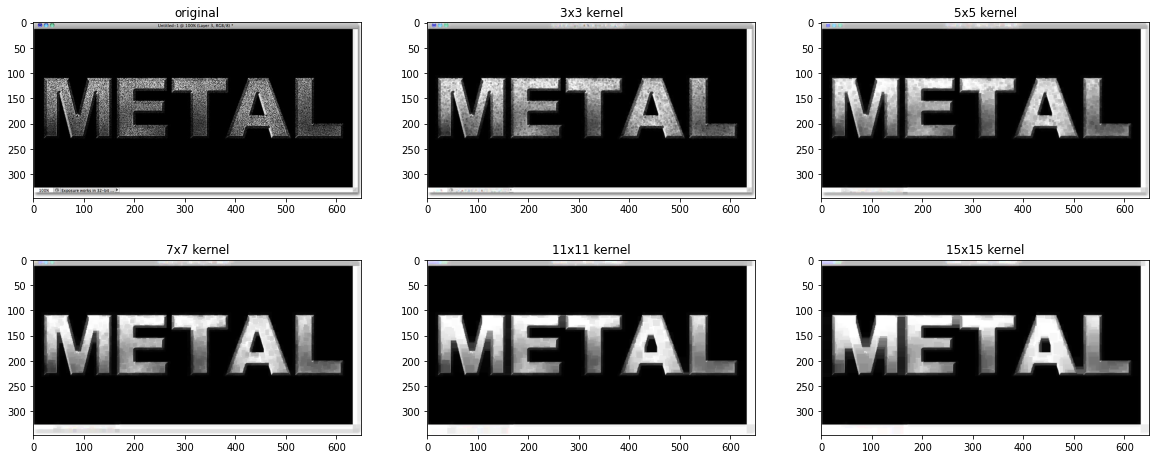

In [61]:
# Apply closing to the thresholded image, experiment with different iterations 

kernel_15 = np.ones((15,15), dtype='uint8')

metal = cv2.imread('./img/metal.jpg')

metal_3 = cv2.morphologyEx(metal, cv2.MORPH_CLOSE, kernel)
metal_5 = cv2.morphologyEx(metal, cv2.MORPH_CLOSE, kernel_5)
metal_7 = cv2.morphologyEx(metal, cv2.MORPH_CLOSE, kernel_7)
metal_11 = cv2.morphologyEx(metal, cv2.MORPH_CLOSE, kernel_11)
metal_15 = cv2.morphologyEx(metal, cv2.MORPH_CLOSE, kernel_15)

fig, axes = plt.subplots(2, 3, figsize=(20, 8))

axes[0, 0].imshow(metal, cmap='gray')
axes[0, 1].imshow(metal_3, cmap='gray')
axes[0, 2].imshow(metal_5, cmap='gray')
axes[1, 0].imshow(metal_7, cmap='gray')
axes[1, 1].imshow(metal_11, cmap='gray')
axes[1, 2].imshow(metal_15, cmap='gray')


axes[0, 0].title.set_text('original')
axes[0, 1].title.set_text('3x3 kernel')
axes[0, 2].title.set_text('5x5 kernel')
axes[1, 0].title.set_text('7x7 kernel')
axes[1, 1].title.set_text('11x11 kernel')
axes[1, 2].title.set_text('15x15 kernel')

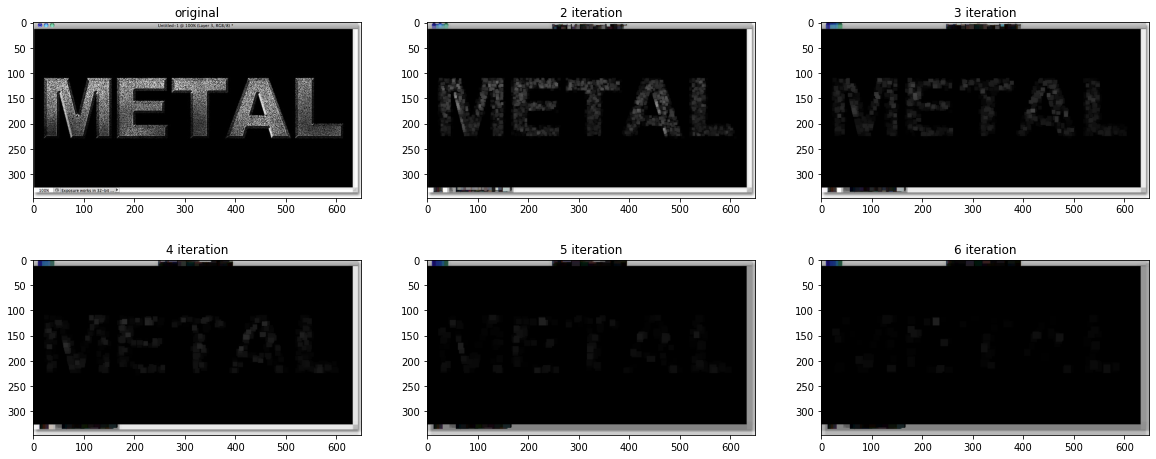

In [65]:
metal_2it = cv2.morphologyEx(metal, cv2.MORPH_OPEN, kernel, iterations=2)
metal_3it = cv2.morphologyEx(metal, cv2.MORPH_OPEN, kernel, iterations=3)
metal_4it = cv2.morphologyEx(metal, cv2.MORPH_OPEN, kernel, iterations=4)
metal_5it = cv2.morphologyEx(metal, cv2.MORPH_OPEN, kernel, iterations=5)
metal_6it = cv2.morphologyEx(metal, cv2.MORPH_OPEN, kernel, iterations=6)


fig, axes = plt.subplots(2, 3, figsize=(20, 8))

axes[0, 0].imshow(metal, cmap='gray')
axes[0, 1].imshow(metal_2it, cmap='gray')
axes[0, 2].imshow(metal_3it, cmap='gray')
axes[1, 0].imshow(metal_4it, cmap='gray')
axes[1, 1].imshow(metal_5it, cmap='gray')
axes[1, 2].imshow(metal_6it, cmap='gray')


axes[0, 0].title.set_text('original')
axes[0, 1].title.set_text('2 iteration')
axes[0, 2].title.set_text('3 iteration')
axes[1, 0].title.set_text('4 iteration')
axes[1, 1].title.set_text('5 iteration')
axes[1, 2].title.set_text('6 iteration')

[Hint](# "cv2.morphologyEx with cv2.MORPH_CLOSE") 